**HMM Model**

In [ ]:
import nltk
from nltk import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
sentence = word_tokenize("James")
nltk.pos_tag(sentence)

[('James', 'NNP')]

In [ ]:
sentence = word_tokenize("applicant is removed from applicant list of the job ")
nltk.pos_tag(sentence)

[('applicant', 'NN'),
 ('is', 'VBZ'),
 ('removed', 'VBN'),
 ('from', 'IN'),
 ('applicant', 'JJ'),
 ('list', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('job', 'NN')]

In [ ]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import pprint, time
 
#download the treebank corpus from nltk
nltk.download('treebank')
#treebank.words()
#print(len(treebank.words()))
 
#download the universal tagset from nltk
nltk.download('universal_tagset')
 
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))
 
#print the first two sentences along with tags
print(nltk_data[:2])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]


In [ ]:
for sent in nltk_data[:1]:
  for tuple in sent:
    print(tuple)

('Pierre', 'NOUN')
('Vinken', 'NOUN')
(',', '.')
('61', 'NUM')
('years', 'NOUN')
('old', 'ADJ')
(',', '.')
('will', 'VERB')
('join', 'VERB')
('the', 'DET')
('board', 'NOUN')
('as', 'ADP')
('a', 'DET')
('nonexecutive', 'ADJ')
('director', 'NOUN')
('Nov.', 'NOUN')
('29', 'NUM')
('.', '.')


In [ ]:
print(nltk_data[:])
print(len(nltk_data))

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('

In [ ]:
# split data into training and validation set in the ratio 80:20
train_set,test_set = train_test_split(nltk_data,train_size=0.80,test_size=0.20,random_state = 101)

In [ ]:
# create list of train and test tagged words
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]
print(len(train_tagged_words))
print(len(test_tagged_words))

80310
20366


In [ ]:
# check some of the tagged words.
train_tagged_words[:5]

[('Drink', 'NOUN'),
 ('Carrier', 'NOUN'),
 ('Competes', 'VERB'),
 ('With', 'ADP'),
 ('Cartons', 'NOUN')]

In [ ]:
#use set datatype to check how many unique tags are present in training data
tags = {tag for word,tag in train_tagged_words}
print(len(tags))
print(tags)
 
# check total words in vocabulary
vocab = {word for word,tag in train_tagged_words}
print(vocab)

12
{'ADJ', 'ADP', '.', 'X', 'NUM', 'PRON', 'DET', 'PRT', 'ADV', 'NOUN', 'VERB', 'CONJ'}
{'resonate', 'Rick', '37.3', 'Charter', 'dismay', '*-36', 'bans', 'Man', 'Notes', 'replacing', 'oblivion', 'Friedrichs', '*-69', '497.34', 'However', 'began', 'unload', 'remained', 'backyard', '*T*-36', 'victim', 'S.', 'suggests', 'advertising', 'demonstrates', 'accidentally', 'Michelin', 'movies', 'three-year', 'Highway', '3436.58', 'aesthetic', 'tasty', '1.4', '6\\/2', 'rate-sensitive', 'editing', 'asserted', 'disagreeable', 'telephone', '11.72', 'way', 'pharmaceutical', 'Florio', '2003\\/2007', 'Europe', 'portrayal', '237-seat', 'arbs', '70.7', 'ill', 'soon', 'ASSOCIATION', 'numbers', 'Maine', 'Carrier', 'Reasons', '*T*-49', 'Treasury', 'slow', 'sketching', 'unclear', 'decisions', 'spread', 'navigation', 'pre-tax', '35.7', 'educational', 'Along', 'Chiodo', 'Chabrol', 'El', 'Osaka', 'affiliate', 'curly', 'mounted', 'Judiciary', 'saved', 'globe', 'inherited', '170,262', 'squeezed', 'Lovett', 'money

In [ ]:
# compute Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words): #word = "vinken" tag="noun"
    tag_list = [pair for pair in train_bag if pair[1]==tag] #count number of nouns in train bag
    count_tag = len(tag_list)#total number of times the passed tag occurred in train_bag
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word] #count number of times that "cartons" is referred as noun
#now calculate the total number of times the passed word occurred as the passed tag.
    count_w_given_tag = len(w_given_tag_list)
 
     
    return (count_w_given_tag, count_tag)

In [ ]:
# compute  Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words): #t1 = noun, t2 = verb
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1]) #number of times noun tag appear
    count_t2_t1 = 0 #number of times verb appear after noun
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [ ]:
# creating t x t transition matrix of tags, t= no of tags
# Matrix(i, j) represents P(jth tag after the ith tag)

tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
 
print(tags_matrix)

[[6.33009672e-02 8.05825219e-02 6.60194159e-02 2.09708735e-02
  2.17475723e-02 1.94174761e-04 5.24271838e-03 1.14563107e-02
  5.24271838e-03 6.96893215e-01 1.14563107e-02 1.68932043e-02]
 [1.07061505e-01 1.69577319e-02 3.87243740e-02 3.45482156e-02
  6.32751212e-02 6.96026310e-02 3.20931405e-01 1.26550242e-03
  1.45532778e-02 3.23588967e-01 8.47886596e-03 1.01240189e-03]
 [4.61323895e-02 9.29084867e-02 9.23720598e-02 2.56410260e-02
  7.82104954e-02 6.87694475e-02 1.72191828e-01 2.78940029e-03
  5.25694676e-02 2.18538776e-01 8.96899477e-02 6.00793920e-02]
 [1.76821072e-02 1.42225638e-01 1.60868734e-01 7.57255405e-02
  3.07514891e-03 5.41995019e-02 5.68902567e-02 1.85085520e-01
  2.57543717e-02 6.16951771e-02 2.06419379e-01 1.03786280e-02]
 [3.53445187e-02 3.74866128e-02 1.19243130e-01 2.02427700e-01
  1.84219927e-01 1.42806140e-03 3.57015361e-03 2.60621198e-02
  3.57015361e-03 3.51660132e-01 2.07068902e-02 1.42806144e-02]
 [7.06150308e-02 2.23234631e-02 4.19134386e-02 8.83826911e-02
  6

In [ ]:
# convert the matrix to a df for better readability
#the table is same as the transition table shown in section 3 of article
#transition matrix
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(tags_df) 

,ADJ,ADP,.,X,NUM,PRON,DET,PRT,ADV,NOUN,VERB,CONJ
ADJ,0.063301,0.080583,0.066019,0.020971,0.021748,0.000194,0.005243,0.011456,0.005243,0.696893,0.011456,0.016893
ADP,0.107062,0.016958,0.038724,0.034548,0.063275,0.069603,0.320931,0.001266,0.014553,0.323589,0.008479,0.001012
.,0.046132,0.092908,0.092372,0.025641,0.078210,0.068769,0.172192,0.002789,0.052569,0.218539,0.089690,0.060079
X,0.017682,0.142226,0.160869,0.075726,0.003075,0.054200,0.056890,0.185086,0.025754,0.061695,0.206419,0.010379
NUM,0.035345,0.037487,0.119243,0.202428,0.184220,0.001428,0.003570,0.026062,0.003570,0.351660,0.020707,0.014281
PRON,0.070615,0.022323,0.041913,0.088383,0.006834,0.006834,0.009567,0.014123,0.036902,0.212756,0.484738,0.005011
DET,0.206411,0.009918,0.017393,0.045134,0.022855,0.003306,0.006037,0.000287,0.012074,0.635906,0.040247,0.000431
PRT,0.082975,0.019569,0.045010,0.012133,0.056751,0.017613,0.101370,0.001174,0.009393,0.250489,0.401174,0.002348
ADV,0.130721,0.119472,0.139255,0.022886,0.029868,0.012025,0.071373,0.014740,0.081458,0.032196,0.339022,0.006982
NOUN,0.012584,0.176827,0.240094,0.028825,0.009144,0.004659,0.013106,0.043935,0.016895,0.262344,0.149134,0.042454


In [ ]:
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
     
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T: 
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                 
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)

        #checking which tag suits the best for that particular word by choosing the max state_probability     
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [ ]:
a = [1,2,3,4,5,6]
a_max = max(a)
print(a_max)
print(a.index(a_max))

6
5


In [ ]:
# Let's test our Viterbi algorithm on a few sample sentences of test dataset
random.seed(1234)      #define a random seed to get same sentences when run multiple times
 
# choose random 10 numbers
rndom = [random.randint(1,len(test_set)) for x in range(1)]
 
# list of 10 sents on which we test the model
test_run = [test_set[i] for i in rndom]
 
# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]
 
# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]

In [ ]:
#Here We will only test 10 sentences to check the accuracy
#as testing the whole training set takes huge amount of time
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
print(tagged_seq)
end = time.time()
difference = end-start
 
print("Time taken in seconds: ", difference)
 
# accuracy
#print(*zip(tagged_seq, test_run_base))
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
print(check)
 
accuracy = len(check)/len(tagged_seq)
print('Viterbi Algorithm Accuracy: ',accuracy*100)

[('The', 'DET'), ('company', 'NOUN'), ('is', 'VERB'), ('contesting', 'ADJ'), ('the', 'DET'), ('fine', 'NOUN'), ('.', '.')]
Time taken in seconds:  2.068441867828369
(('The', 'DET'), ('The', 'DET')) (('company', 'NOUN'), ('company', 'NOUN')) (('is', 'VERB'), ('is', 'VERB')) (('contesting', 'ADJ'), ('contesting', 'VERB')) (('the', 'DET'), ('the', 'DET')) (('fine', 'NOUN'), ('fine', 'NOUN')) (('.', '.'), ('.', '.'))
[('The', 'DET'), ('company', 'NOUN'), ('is', 'VERB'), ('the', 'DET'), ('fine', 'NOUN'), ('.', '.')]
Viterbi Algorithm Accuracy:  85.71428571428571


**GloVe Model**

In [ ]:
! pip install glove-python-binary
import nltk 
nltk.download('stopwords')
nltk.download ('punkt')
nltk.download('wordnet')

     |████████████████████████████████| 948 kB 6.1 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lines=  ["Hello this is a tutorial to convert word to integer" , "It is a beautiful day" , "Jack is going to office"]
from nltk.tokenize import sent_tokenize, word_tokenize
word_tokens=[]
i=0
for line in lines:
 words = word_tokenize(line)
 word_tokens.insert(i,words)
 i=i+1
print (word_tokens)

[['Hello', 'this', 'is', 'a', 'tutorial', 'to', 'convert', 'word', 'to', 'integer'], ['It', 'is', 'a', 'beautiful', 'day'], ['Jack', 'is', 'going', 'to', 'office']]


In [ ]:
from nltk.corpus import stopwords 
stop_words=stopwords.words('english') 
lines_without_stopwords=[] 
for line in lines: 
  stop_removed=[] 
for line in word_tokens:
  for word in line: 
    if word not in stop_words: 
      stop_removed.append(word) 
print (stop_removed)

['Hello', 'tutorial', 'convert', 'word', 'integer', 'It', 'beautiful', 'day', 'Jack', 'going', 'office']


In [ ]:
from nltk import WordNetLemmatizer  
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer() 
lines_with_lemmas=[] #stop words contain the set of stop words 
for line in lines: 
  lem_line=[] 
for word in stop_removed: 
  lem_line.append(wordnet_lemmatizer.lemmatize(word)) 
string='' 
new_lines=','.join([str(i) for i in lem_line])
print (lem_line)
print (new_lines)
#new_lines = new_lines.split(",")
#print (type(new_lines))

['Hello', 'tutorial', 'convert', 'word', 'integer', 'It', 'beautiful', 'day', 'Jack', 'going', 'office']
Hello,tutorial,convert,word,integer,It,beautiful,day,Jack,going,office
<class 'list'>


In [ ]:
#importing the glove library
from glove import Corpus, Glove
# creating a corpus object
corpus = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(lem_line,window=10)
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=5, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

TypeError: ignored

# GloVe direct plotting from dataset of words and dimensions

In [1]:
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In [3]:
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

('glove.6B.zip', <http.client.HTTPMessage at 0x7fd2b9dced90>)

In [4]:
!unzip "/content/glove.6B.zip" -d "/content/"

Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


In [6]:
emmbed_dict = {}
with open('/content/glove.6B.200d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    emmbed_dict[word]=vector

In [11]:
emmbed_dict['india']

array([ 7.0372e-01,  6.3592e-01, -4.9522e-02,  8.0130e-02, -2.3837e-01,
        1.6099e-01,  4.0911e-01,  1.0195e-02, -3.8136e-02, -1.1211e-01,
       -1.5057e-01,  1.0014e+00, -5.1784e-01,  1.1428e-01, -2.5988e-01,
       -1.2952e-01, -3.8066e-01,  5.6304e-01, -2.0361e-01,  4.2629e-01,
        3.1651e-03,  3.2066e+00, -1.4814e-01,  1.9738e-01,  6.0954e-01,
       -2.0487e-01, -1.6529e-01,  1.5731e+00,  8.1018e-01,  5.4659e-03,
        4.4647e-01, -1.1974e+00, -1.6670e-01, -3.4957e-02, -2.3592e-01,
        1.9449e-01, -3.0062e-01, -4.7871e-01, -5.4198e-02, -9.3299e-02,
       -3.4409e-01, -2.9381e-01,  2.5181e-01,  6.3102e-01, -7.2367e-01,
       -3.8043e-01, -8.7755e-02, -4.3951e-01, -1.7207e-01, -5.2170e-01,
       -2.4400e-01, -4.4542e-02, -1.6838e-01, -2.6438e-01, -1.7562e-01,
       -3.3746e-01, -3.8011e-01,  1.1634e-01,  3.5150e-01,  1.9324e-01,
       -7.1287e-01,  5.4914e-01, -1.6859e-01,  3.2083e-01,  8.4012e-01,
        2.3606e-02, -3.6049e-01, -1.6917e-01,  2.1749e-02, -8.32

In [7]:
def find_similar_word(emmbedes):
  nearest = sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
  return nearest

In [8]:
find_similar_word(emmbed_dict['river'])[0:10]

['river',
 'rivers',
 'tributary',
 'confluence',
 'creek',
 'along',
 'tributaries',
 'valley',
 'flows',
 'danube']

In [9]:
find_similar_word(emmbed_dict['king'] + emmbed_dict['queen'] + emmbed_dict['prince'])[0:10]

['king',
 'prince',
 'queen',
 'princess',
 'crown',
 'throne',
 'royal',
 'monarch',
 'kingdom',
 'duke']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


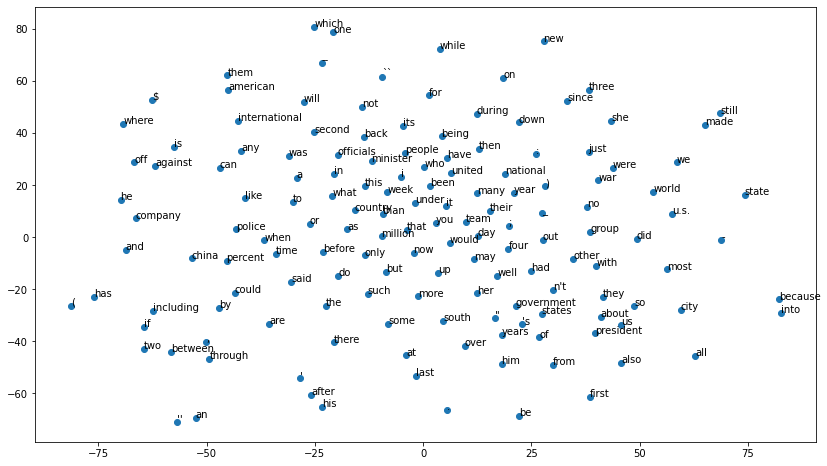

In [10]:
distri = TSNE(n_components=2)
words = list(emmbed_dict.keys())
vectors = [emmbed_dict[word] for word in words]
y = distri.fit_transform(vectors[700:850])
#fit_transform applies a dimensionality reduction on the array.

plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()